<a href="https://colab.research.google.com/github/ShantanuSingh152/Brain-Tumor-Detection/blob/master/Brain_Tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.utils import plot_model


In [2]:
# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

datadir = "/content/drive/MyDrive/Brain_Tumor/Training"
categories = ["glioma", "meningioma", "notumor", "pituitary"]

# Load images and labels
data = []
labels = []
img_size = 150  # Define the desired image size

In [ ]:
# Define constants
batch_size = 32
epochs = 20

In [ ]:

for category in categories:
    path = os.path.join(datadir, category)
    class_num = categories.index(category)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img))
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            img_array = cv2.resize(img_array, (img_size, img_size))
            data.append(img_array)
            labels.append(class_num)
        except Exception as e:
            pass


In [ ]:
# Convert to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Normalize data
data = data.astype('float32') / 255.0

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


In [ ]:
# Data augmentation
train_datagen = ImageDataGenerator(rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)

In [ ]:
# Defining model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(len(categories), activation='softmax'))

In [ ]:
# Compile model
#model.compile(optimizer=Adam(learning_rate=0.001),
 #             loss='sparse_categorical_crossentropy',
  #            metrics=['accuracy'])
from keras.optimizers import RMSprop
# Compile model
#model.compile(optimizer=RMSprop(lr=0.001),
 #            metrics=['accuracy'])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Data augmentation for validation set
valid_datagen = ImageDataGenerator()

valid_generator = valid_datagen.flow(X_test, y_test, batch_size=batch_size)


In [ ]:
# Train model
history = model.fit(train_generator,
                    steps_per_epoch=len(X_train) // 32,
                    epochs=50,
                    validation_data=valid_generator,
                    validation_steps=len(X_test) // 32)

Epoch 1/50
143/143 [==============================] - 378s 3s/step - loss: 1.2292 - accuracy: 0.5872 - val_loss: 2.7424 - val_accuracy: 0.2580
Epoch 2/50
143/143 [==============================] - 369s 3s/step - loss: 0.9280 - accuracy: 0.6706 - val_loss: 1.4988 - val_accuracy: 0.5777
Epoch 3/50
143/143 [==============================] - 386s 3s/step - loss: 0.8061 - accuracy: 0.7069 - val_loss: 0.9719 - val_accuracy: 0.6107
Epoch 4/50
143/143 [==============================] - 361s 3s/step - loss: 0.7263 - accuracy: 0.7314 - val_loss: 0.5755 - val_accuracy: 0.7875
Epoch 5/50
143/143 [==============================] - 369s 3s/step - loss: 0.6837 - accuracy: 0.7516 - val_loss: 0.6836 - val_accuracy: 0.7759
Epoch 6/50
143/143 [==============================] - 385s 3s/step - loss: 0.5790 - accuracy: 0.7875 - val_loss: 0.6835 - val_accuracy: 0.7821
Epoch 7/50
143/143 [==============================] - 365s 3s/step - loss: 0.5796 - accuracy: 0.7861 - val_loss: 0.8338 - val_accuracy: 0.7455

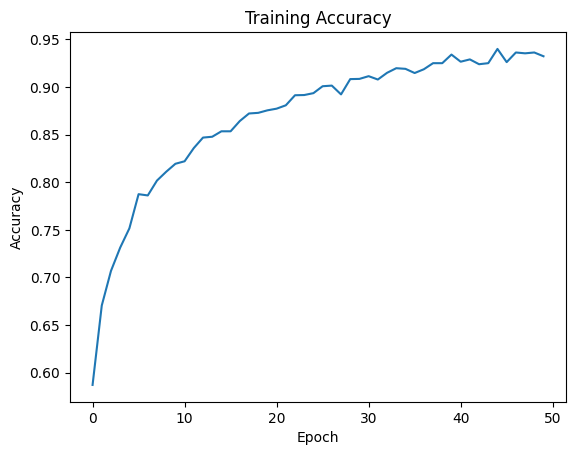

In [ ]:
# Plot training accuracy
plt.plot(history.history['accuracy'])
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


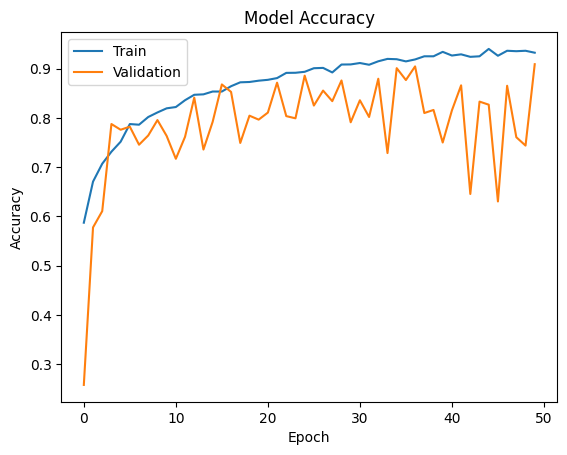

In [ ]:
# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


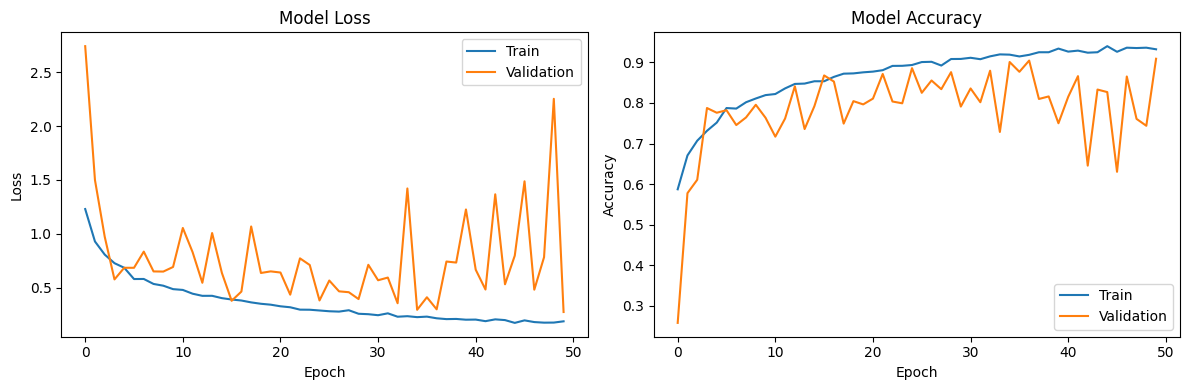

In [ ]:
# Plot loss and accuracy
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.tight_layout()
plt.show()


36/36 [==============================] - 23s 613ms/step


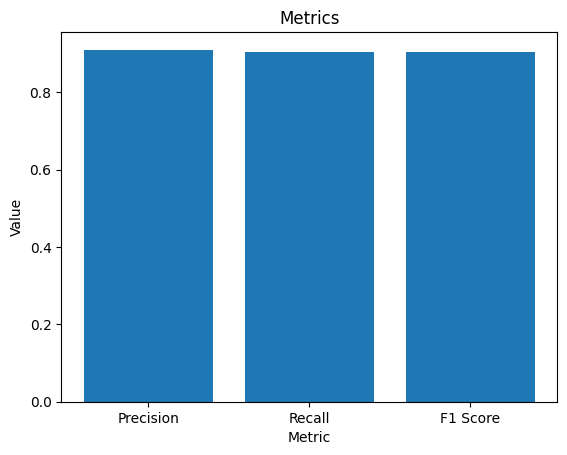

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Collect true labels and predicted probabilities for all test data
true_labels = y_test
predicted_probabilities = model.predict(X_test)
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Calculate precision, recall, and F1 score
precision = precision_score(true_labels, predicted_labels, average='macro')
recall = recall_score(true_labels, predicted_labels, average='macro')
f1 = f1_score(true_labels, predicted_labels, average='macro')

# Create a bar graph to visualize the metrics
metrics = ['Precision', 'Recall', 'F1 Score']
values = [precision, recall, f1]

plt.bar(metrics, values)
plt.title('Metrics')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Collect true labels and predicted labels for all test data
true_labels = y_test
predicted_probabilities = model.predict(X_test)
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Calculate precision, recall, and F1 score
report = classification_report(true_labels, predicted_labels, target_names=categories, digits=4, output_dict=True)

# Display the metrics in a table form
table_data = []
table_data.append(['Category', 'Precision', 'Recall', 'F1 Score'])
for category in categories:
    precision = report[category]['precision']
    recall = report[category]['recall']
    f1 = report[category]['f1-score']
    table_data.append([category, precision, recall, f1])

# Print the table
table_format = '{:<15}' * 4
for row in table_data:
    print(table_format.format(*row))


36/36 [==============================] - 29s 787ms/step
Category       Precision      Recall         F1 Score       
glioma         0.97991967871485940.85915492957746480.9155722326454033
meningioma     0.86614173228346460.80882352941176470.8365019011406843
notumor        0.94630872483221470.96575342465753420.9559322033898304
pituitary      0.84883720930232550.98316498316498310.9110764430577223


In [ ]:
# Take one image from test data
image_index = 0
test_image = X_test[image_index]

# Reshape the image to match the input shape of the model
test_image = np.reshape(test_image, (1, img_size, img_size, 3))

# Perform prediction
prediction = model.predict(test_image)
predicted_class_index = np.argmax(prediction)
predicted_class = categories[predicted_class_index]

# Print the predicted class
print("Predicted class:", predicted_class)


1/1 [==============================] - 0s 71ms/step
Predicted class: meningioma


1/1 [==============================] - 0s 107ms/step


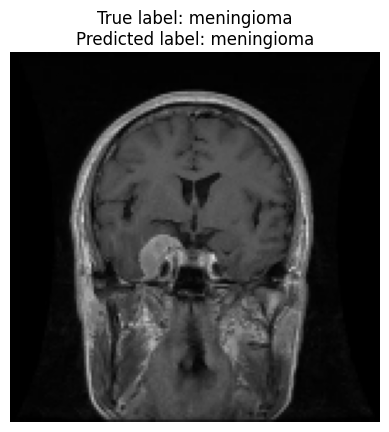

In [ ]:
import matplotlib.pyplot as plt

# Take one image from test data
image_index = 0
test_image = X_test[image_index]
true_label = categories[y_test[image_index]]

# Reshape the image to match the input shape of the model
test_image = np.reshape(test_image, (1, img_size, img_size, 3))

# Perform prediction
prediction = model.predict(test_image)
predicted_class_index = np.argmax(prediction)
predicted_class = categories[predicted_class_index]

# Display the image
plt.imshow(test_image[0])
plt.axis('off')
plt.title('True label: {}\nPredicted label: {}'.format(true_label, predicted_class))
plt.show()


1/1 [==============================] - 0s 40ms/step


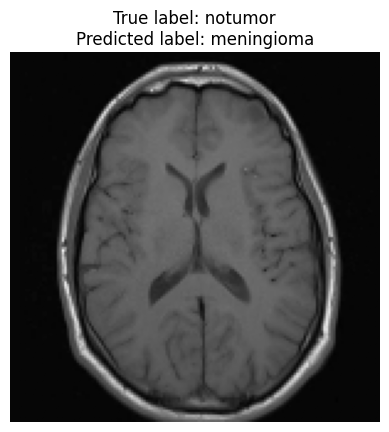

In [ ]:
import matplotlib.pyplot as plt

# Take one image from test data
image_index = 10
test_image = X_test[image_index]
true_label = categories[y_test[image_index]]

# Reshape the image to match the input shape of the model
test_image = np.reshape(test_image, (1, img_size, img_size, 3))

# Perform prediction
prediction = model.predict(test_image)
predicted_class_index = np.argmax(prediction)
predicted_class = categories[predicted_class_index]

# Display the image
plt.imshow(test_image[0])
plt.axis('off')
plt.title('True label: {}\nPredicted label: {}'.format(true_label, predicted_class))
plt.show()


1/1 [==============================] - 0s 60ms/step


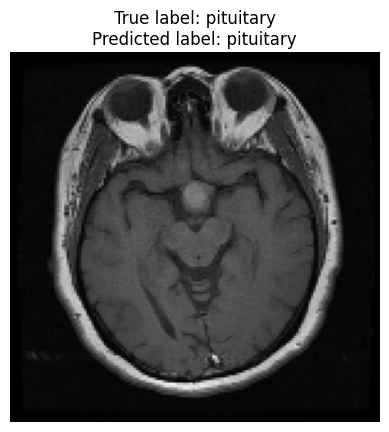

In [ ]:
import matplotlib.pyplot as plt

# Take the 29th image from the test data
image_index = 28  # 29th image (indices start from 0)
test_image = X_test[image_index]
true_label = categories[y_test[image_index]]

# Reshape the image to match the input shape of the model
test_image = np.reshape(test_image, (1, img_size, img_size, 3))

# Perform prediction
prediction = model.predict(test_image)
predicted_class_index = np.argmax(prediction)
predicted_class = categories[predicted_class_index]

# Display the image
plt.imshow(test_image[0])
plt.axis('off')
plt.title('True label: {}\nPredicted label: {}'.format(true_label, predicted_class))
plt.show()


1/1 [==============================] - 0s 114ms/step


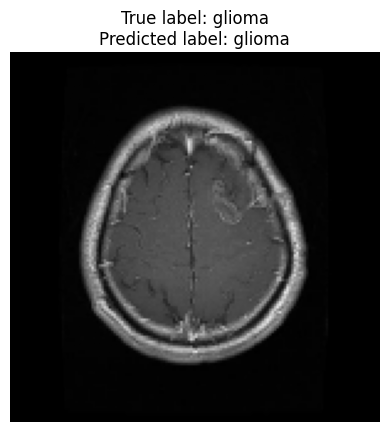

In [ ]:
import matplotlib.pyplot as plt

# Take the 29th image from the test data
image_index = 60  # 29th image (indices start from 0)
test_image = X_test[image_index]
true_label = categories[y_test[image_index]]

# Reshape the image to match the input shape of the model
test_image = np.reshape(test_image, (1, img_size, img_size, 3))

# Perform prediction
prediction = model.predict(test_image)
predicted_class_index = np.argmax(prediction)
predicted_class = categories[predicted_class_index]

# Display the image
plt.imshow(test_image[0])
plt.axis('off')
plt.title('True label: {}\nPredicted label: {}'.format(true_label, predicted_class))
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Take the 29th image from the test data
image_index = 200  # 29th image (indices start from 0)
test_image = X_test[image_index]
true_label = categories[y_test[image_index]]

# Reshape the image to match the input shape of the model
test_image = np.reshape(test_image, (1, img_size, img_size, 3))

# Perform prediction
prediction = model.predict(test_image)
predicted_class_index = np.argmax(prediction)
predicted_class = categories[predicted_class_index]

# Display the image
plt.imshow(test_image[0])
plt.axis('off')
plt.title('True label: {}\nPredicted label: {}'.format(true_label, predicted_class))
plt.show()


NameError: name 'X_test' is not defined